In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from os import walk
from matplotlib import cm

Using TensorFlow backend.


In [2]:
def get_files(folder_name):
    entries = os.listdir(folder_name)
    temp = []
    for (dirpath, dirnames, filenames) in walk(folder_name):
        for x in filenames:
            if x.endswith(".jpg"):
                temp.append(os.path.join(dirpath, x))
    return temp

In [3]:
dataframe = pd.read_csv('dataset_label.csv')
tmp = {}
tmp[0] = 0
tmp[1] = 0
tmp[2] = 0
for i in dataframe['ethnic']:
    tmp[i] += 1
tmp

{0: 332, 1: 600, 2: 748}

In [4]:
from os import walk
def read_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (COLS, ROWS))
    return img

def prep_data(images):
    count = len(images)
#     data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    # with color
    data = np.ndarray((count, ROWS, COLS, 3), dtype=np.uint8)
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
    return data

In [5]:
ROWS = 96
COLS = 128
# CHANNELS = 1
image_df = prep_data(dataframe['file_name'])
label = dataframe['ethnic']

In [6]:
from keras.layers import Dense, Conv2D, Flatten
def custom_model(num_classes):
    model = Sequential()

    model.add(Convolution2D(96, 5, 5, border_mode='valid', input_shape=(96, 128, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(48, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    return model

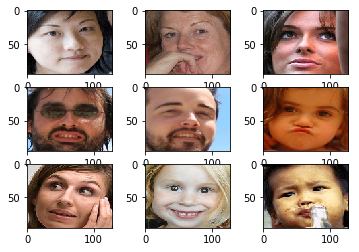

In [7]:
fig = plt.figure()

for i in range(9):
    ax1 = fig.add_subplot(3,3,i+1)
    ax1.imshow(image_df[i])
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_df, label,test_size=0.20)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
model = custom_model(3)
model.fit(x_train, y_train, nb_epoch=10, batch_size=250, verbose=2)

scores = model.evaluate(x_test, y_test, verbose=0)
print("Classification Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Colocations handled automatically by placer.


/home/sangbijaksana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (5, 5), input_shape=(96, 128, ..., activation="relu", padding="valid")`
  """
/home/sangbijaksana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  import sys


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/home/sangbijaksana/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
 - 62s - loss: 9.9949 - acc: 0.3631
Epoch 2/10
 - 55s - loss: 10.4816 - acc: 0.3497
Epoch 3/10
 - 55s - loss: 10.4816 - acc: 0.3497
Epoch 4/10
 - 54s - loss: 10.4816 - acc: 0.3497
Epoch 5/10
 - 54s - loss: 10.4816 - acc: 0.3497
Epoch 6/10
 - 56s - loss: 10.4816 - acc: 0.3497
Epoch 7/10
 - 55s - loss: 10.4816 - acc: 0.3497
Epoch 8/10
 - 54s - loss: 10.4816 - acc: 0.3497
Epoch 9/10
 - 55s - loss: 10.4816 - acc: 0.3497
Epoch 10/10
 - 55s - loss: 10.4816 - acc: 0.3497
Classification Error: 61.31%
